In [51]:
import numpy as np
import astropy.io.fits as fits
import astropy.units as u
from IPython.display import clear_output
import time

from scipy.ndimage import rotate
from scipy.interpolate import RegularGridInterpolator
import h5py
import os
from pathlib import Path

import misc
from matplotlib.patches import Circle
from importlib import reload
reload(misc)

wavelength_c = 575e-9*u.m
D = 2.3631*u.m
mas_per_lamD = (wavelength_c/D*u.radian).to(u.mas)

# define desired PSF dimensions and pixelscale in units of lambda/D
npsf = 256                   # output image dimension (must be power of 2)
psf_pixelscale_lamD = 0.1    # output sampling in lam0/D
psf_pixelscale_mas = psf_pixelscale_lamD*mas_per_lamD/u.pix

# define the offsets in lambda/D for which the PSFs will be created
start = 0
stop = 11
step = 0.05
offsets_lamD = np.arange(start,stop+step,step)
offsets_mas = offsets_lamD*mas_per_lamD
print(len(offsets_lamD))

polaxis = 1

ndisk = 100
disk_pixelscale_mas = 20.8*u.mas/u.pix

iwa = 2.8
owa = 9.7
iwa_mas = iwa*mas_per_lamD
owa_mas = owa*mas_per_lamD


221


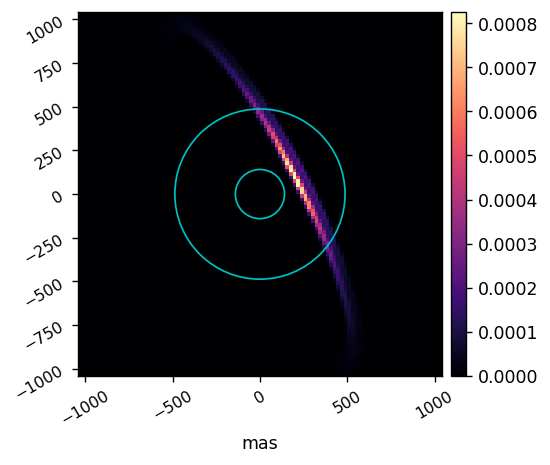

In [50]:
disk_fpath = Path('C:/Users/Kian/Documents/data-files/disk-processing/disks/I_0_HR4796.fits')

disk = misc.pad_or_crop(fits.getdata(disk_fpath), ndisk)
dhdr = fits.getheader(disk_fpath)

patches = [Circle((0, 0), iwa_mas.value, color='c', fill=False), Circle((0, 0), owa_mas.value, color='c', fill=False)]
misc.myimshow(disk, pxscl=disk_pixelscale_mas, patches=patches, lognorm=False)

# Do the matrix multiplication

In [37]:
ipsf_fpath = Path('C:/Users/Kian/Documents/data-files/disk-processing/ipsfs/ipsf_matrix_polaxis{:d}.hdf5'.format(polaxis))
f = h5py.File(ipsf_fpath, 'r')
ipsf_matrix = np.array(f['IPSF Matrix'])
f.close()

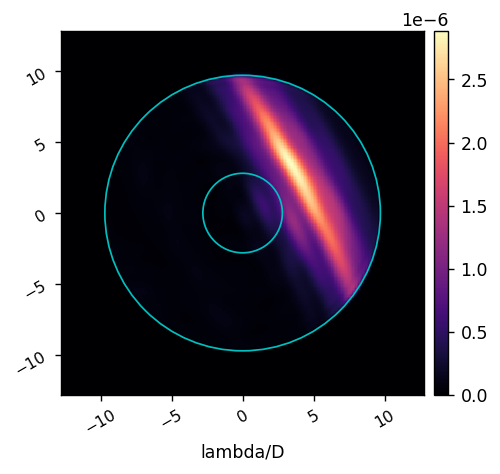

In [53]:
disk_sim = np.reshape(ipsf_matrix.dot(disk.flatten()), (npsf,npsf))
patches = [Circle((0, 0), iwa, color='c', fill=False), Circle((0, 0), owa, color='c', fill=False)]
misc.myimshow(disk_sim, pxscl=psf_pixelscale_lamD, lognorm=False, patches=patches)